In [3]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [14]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("stats_1.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [15]:
arr

,sizes,times
0,100,"[58, 56, 46, 39, 37, 34, 37, 49, 43, 35]"
1,200,"[156, 147, 154, 156, 149, 158, 148, 150, 155, ..."
2,300,"[381, 386, 382, 396, 381, 394, 387, 382, 408, ..."
3,400,"[815, 815, 795, 817, 789, 796, 776, 774, 766, ..."
4,500,"[1378, 1390, 1371, 1413, 1371, 1364, 1356, 140..."
5,600,"[2231, 2222, 2188, 2213, 2214, 2210, 2251, 219..."
6,700,"[3312, 3309, 3379, 3385, 3369, 3426, 3620, 346..."
7,800,"[4709, 4935, 5185, 4867, 4687, 4638, 4706, 531..."
8,900,"[6496, 6796, 6871, 7746, 6662, 7102, 7553, 650..."
9,1000,"[10510, 10454, 10807, 10787, 11195, 11773, 120..."


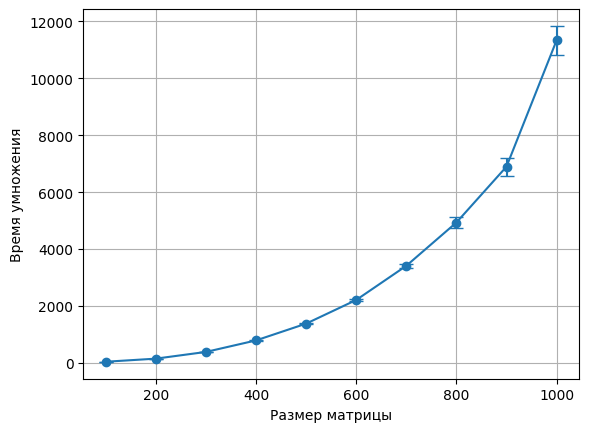

In [16]:

plot_intervals(sizes, intervals)